In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("Indian automoble buying behavour study 1.0.csv")
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [4]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [5]:
df.shape

(99, 13)

In [6]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [7]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [8]:
# Convert Yes/No to 1/0
binary_columns = ['Personal loan', 'House Loan', 'Wife Working']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})



C:\Users\sneha\AppData\Local\Temp\ipykernel_12832\324942112.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})


In [9]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df

,age,profession,marrital_status,education,no_of_dependents,personal_loan,house_loan,wife_working,salary,wife_salary,total_salary,make,price
0,27,Salaried,Single,Post Graduate,0,1,0,0,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,1,0,1,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,0,0,0,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,0,0,1,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,1,1,0,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,0,0,1,2700000,1300000,4000000,Creata,1500000


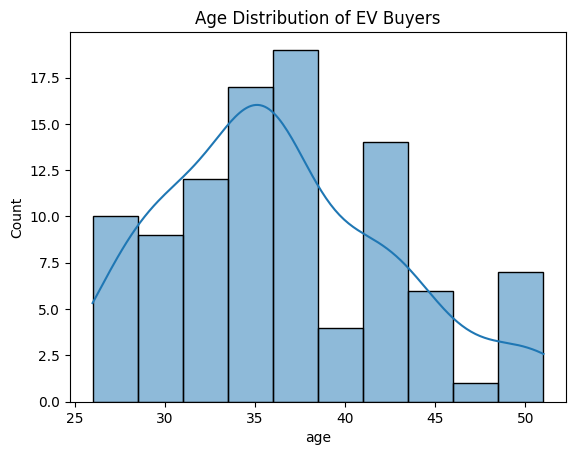

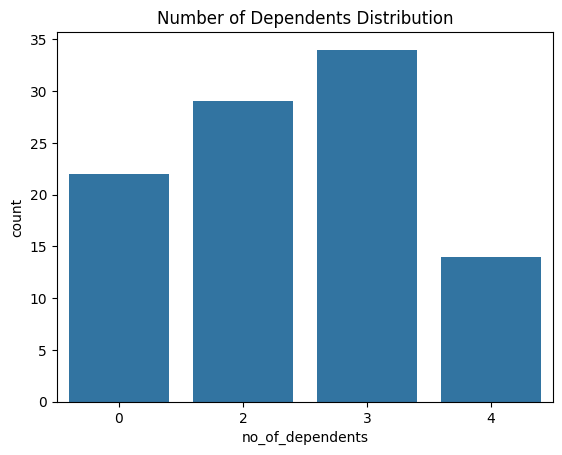

In [10]:
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Age Distribution of EV Buyers")
plt.show()

sns.countplot(x='no_of_dependents', data=df)
plt.title("Number of Dependents Distribution")
plt.show()


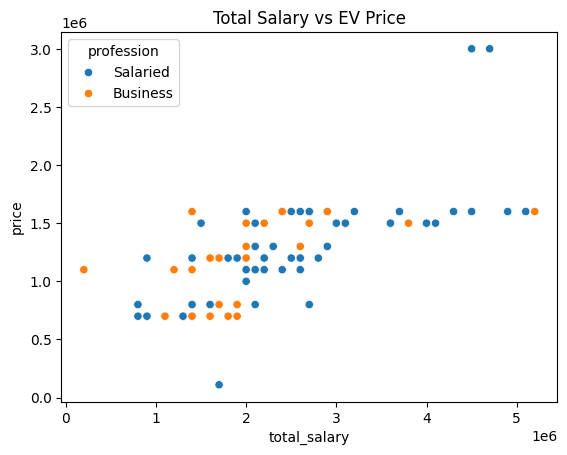

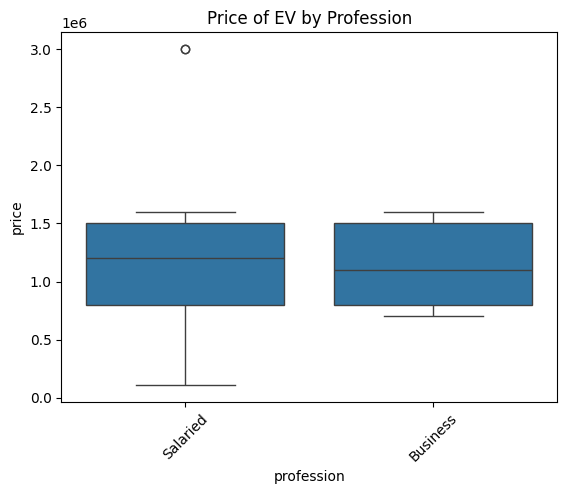

In [11]:
sns.scatterplot(x='total_salary', y='price', hue='profession', data=df)
plt.title("Total Salary vs EV Price")
plt.show()


sns.boxplot(x='profession', y='price', data=df)
plt.title("Price of EV by Profession")
plt.xticks(rotation=45)
plt.show()


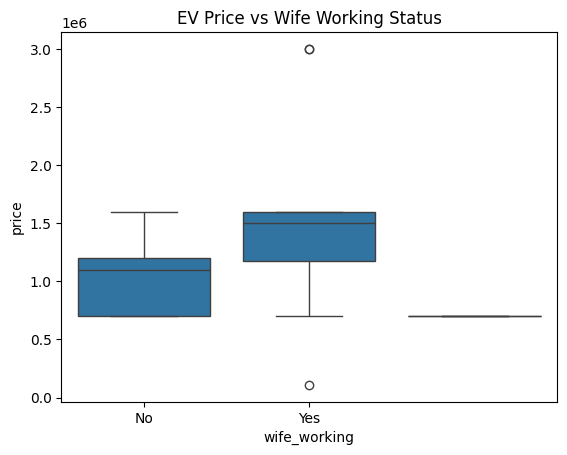

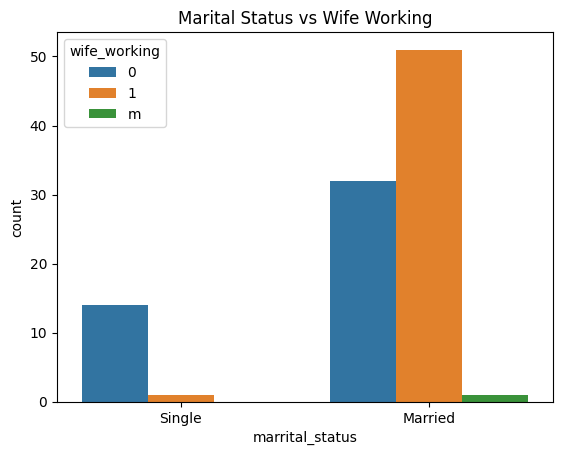

In [12]:
sns.boxplot(x='wife_working', y='price', data=df)
plt.title("EV Price vs Wife Working Status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

sns.countplot(x='marrital_status', hue='wife_working', data=df)
plt.title("Marital Status vs Wife Working")
plt.show()


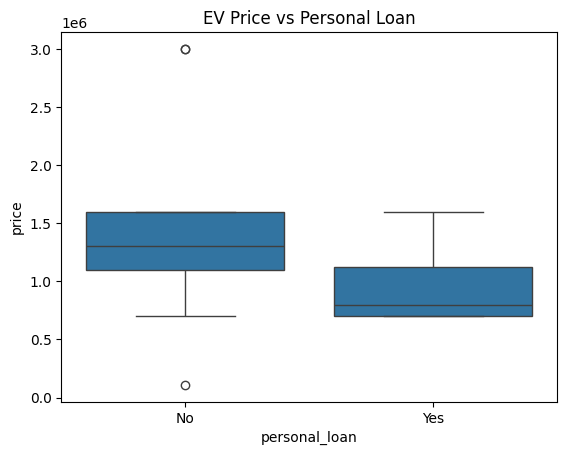

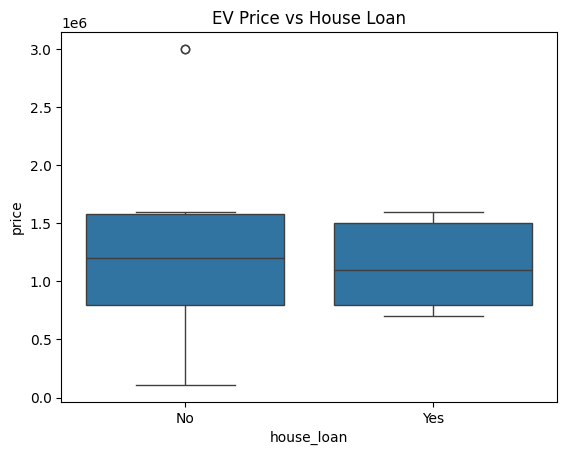

In [13]:
loan_cols = ['personal_loan', 'house_loan']
for col in loan_cols:
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f"EV Price vs {col.replace('_', ' ').title()}")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()


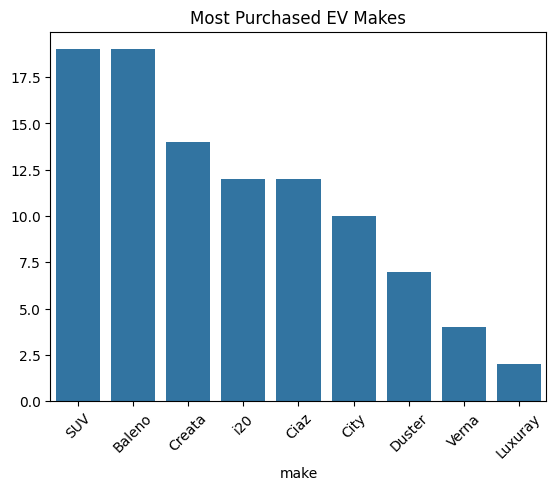

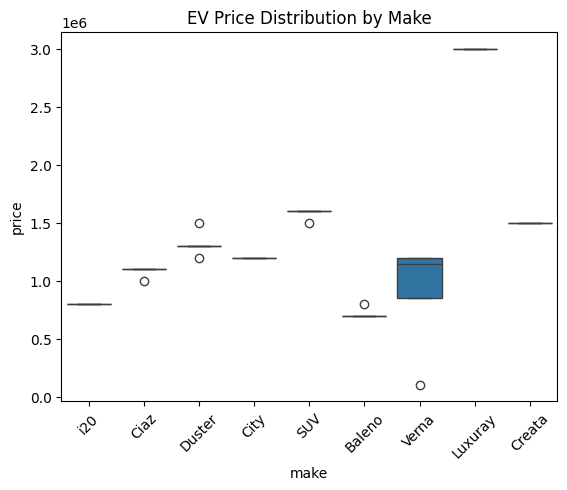

In [14]:
top_makes = df['make'].value_counts()
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title("Most Purchased EV Makes")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='make', y='price', data=df)
plt.title("EV Price Distribution by Make")
plt.xticks(rotation=45)
plt.show()


In [15]:
# Total Salary into ranges

In [16]:
bins = [0, 1000000, 2000000, 3000000, 4000000, 6000000]
labels = ['<10L', '10L-20L', '20L-30L', '30L-40L', '40L+']
df['Salary_Group'] = pd.cut(df['total_salary'], bins=bins, labels=labels)
df

,age,profession,marrital_status,education,no_of_dependents,personal_loan,house_loan,wife_working,salary,wife_salary,total_salary,make,price,Salary_Group
0,27,Salaried,Single,Post Graduate,0,1,0,0,800000,0,800000,i20,800000,<10L
1,35,Salaried,Married,Post Graduate,2,1,1,1,1400000,600000,2000000,Ciaz,1000000,10L-20L
2,45,Business,Married,Graduate,4,1,1,0,1800000,0,1800000,Duster,1200000,10L-20L
3,41,Business,Married,Post Graduate,3,0,0,1,1600000,600000,2200000,City,1200000,20L-30L
4,31,Salaried,Married,Post Graduate,2,1,0,1,1800000,800000,2600000,SUV,1600000,20L-30L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,0,0,0,2400000,0,2400000,SUV,1600000,20L-30L
95,50,Salaried,Married,Post Graduate,3,0,0,1,3800000,1300000,5100000,SUV,1600000,40L+
96,51,Business,Married,Graduate,2,1,1,0,2200000,0,2200000,Ciaz,1100000,20L-30L
97,51,Salaried,Married,Post Graduate,2,0,0,1,2700000,1300000,4000000,Creata,1500000,30L-40L


### Visualize the result

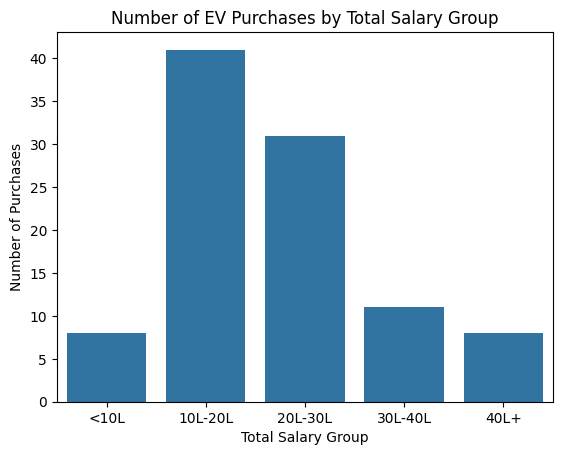

In [20]:


sns.barplot(x=group_counts.index, y=group_counts.values)
plt.title("Number of EV Purchases by Total Salary Group")
plt.xlabel("Total Salary Group")
plt.ylabel("Number of Purchases")
plt.show()


In [28]:
# Create custom bins and labels
bins = [0, 1000000, 2000000, 3000000, 4000000, float('inf')]
labels = ['<10L', '10L-20L', '20L-30L', '30L-40L', '40L+']

# Apply segmentation
df['Salary_Group'] = pd.cut(df['total_salary'], bins=bins, labels=labels)

# Count how many people in each group
print(df['Salary_Group'].value_counts().sort_index())


Salary_Group
<10L        8
10L-20L    41
20L-30L    31
30L-40L    11
40L+        8
Name: count, dtype: int64


C:\Users\sneha\AppData\Local\Temp\ipykernel_12832\1990871288.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Salary_Group', y='price', palette='coolwarm')


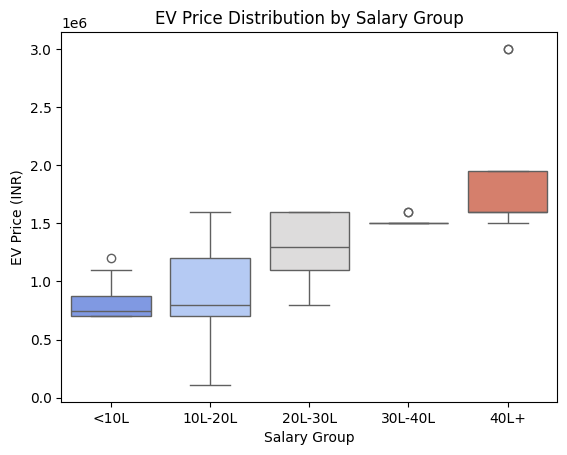

In [34]:
sns.boxplot(data=df, x='Salary_Group', y='price', palette='coolwarm')
plt.title("EV Price Distribution by Salary Group")
plt.ylabel("EV Price (INR)")
plt.xlabel("Salary Group")
plt.show()


In [ ]:
# KMeans Clustering on Total Salary

In [46]:
#Extract only the total_salary feature for clustering
X = df[['total_salary']]
#Standardize the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [48]:
#Use Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

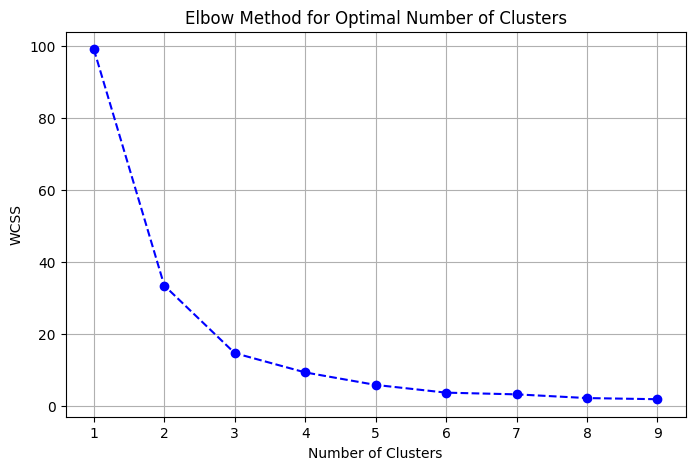

In [50]:
#Plot Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [52]:
# Apply KMeans with chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Salary_Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


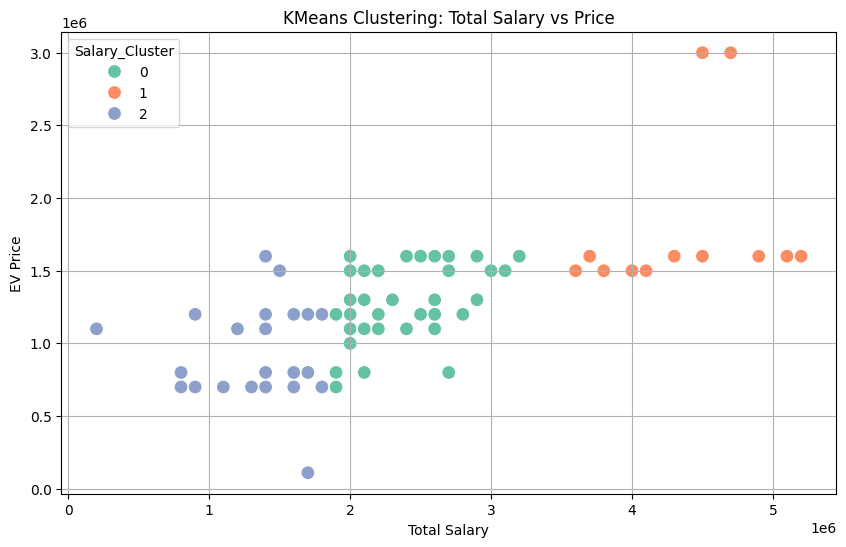

In [54]:
#Scatter Plot - Total Salary vs Price by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_salary', y='price', hue='Salary_Cluster', palette='Set2', s=100)
plt.title('KMeans Clustering: Total Salary vs Price')
plt.xlabel('Total Salary')
plt.ylabel('EV Price')
plt.grid(True)
plt.show()


C:\Users\sneha\AppData\Local\Temp\ipykernel_12832\352598153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Salary_Cluster', palette=['#FF6347', '#4682B4', '#32CD32'])  # Custom colors


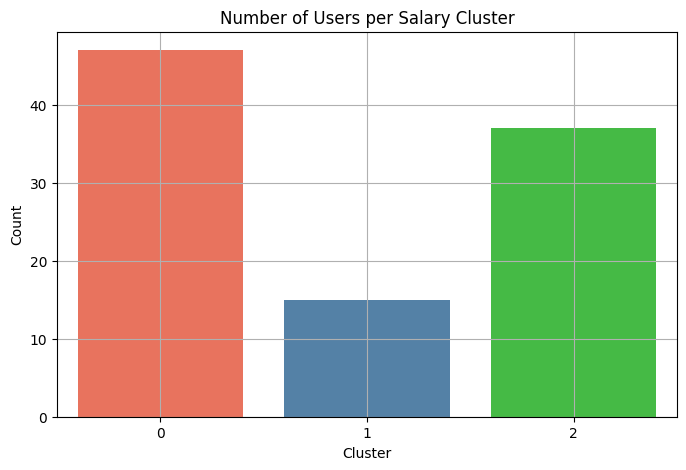

In [64]:
# Countplot - Number of Users in Each Cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Salary_Cluster', palette=['#FF6347', '#4682B4', '#32CD32'])  # Custom colors
plt.title('Number of Users per Salary Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()


C:\Users\sneha\AppData\Local\Temp\ipykernel_12832\1785990690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Salary_Cluster', y='total_salary', palette=['#FF6347', '#4682B4', '#32CD32'])  # Custom colors


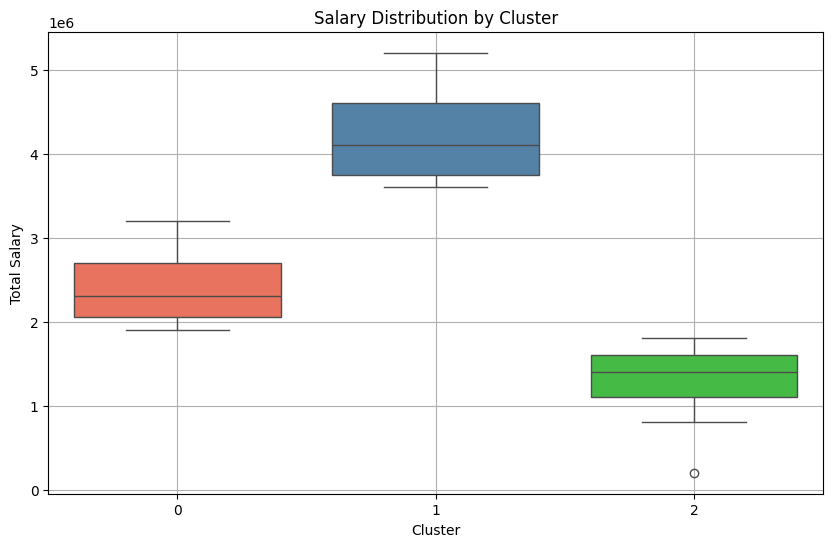

In [68]:
#Boxplot - Salary Distribution per Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Salary_Cluster', y='total_salary', palette=['#FF6347', '#4682B4', '#32CD32'])  # Custom colors
plt.title('Salary Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Salary')
plt.grid(True)
plt.show()


In [60]:
#Optional - Show Cluster Centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Total Salary):", cluster_centers.flatten())


Cluster Centers (Total Salary): [2389361.70212766 4240000.         1321621.62162162]
